In [1]:

import numpy as np
import pandas as pd


import matplotlib.pyplot as plt
import pydot
import seaborn as sns

from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV


import tensorflow as tf
from tensorflow.keras import layers
import keras
from keras.models import Sequential
from tensorflow.keras.layers import Dense,Activation,Dropout
from keras.datasets import mnist
from tensorflow.keras.utils import to_categorical
#from tensorflow.keras.wrappers.scikit_learn import KerasClassifier
from scikeras.wrappers import KerasClassifier



In [3]:
# loading data available in the CSV file... 

fashion_train = pd.read_csv("fashion-mnist_train.csv")
fashion_test = pd.read_csv("fashion-mnist_test.csv")

In [ ]:
fashion_train.shape  # the images are already preprocessed (3D ---> 2D)

In [50]:
fashion_test.shape

(10000, 785)

In [9]:
# spliting input and output variables for training and testing dataset

X_train_fashion = fashion_train.drop('label',axis = 1)
y_train_fashion = fashion_train['label']
X_test_fashion = fashion_test.drop('label',axis = 1)
y_test_fashion = fashion_test['label']

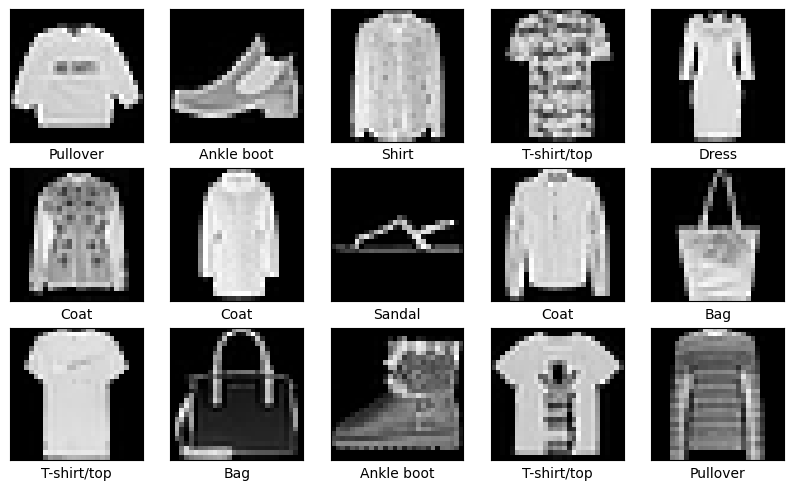

In [11]:
# reshaping the image to 28*28 format... "-1" indicates that for all images we are doing this

X_train_reshape = X_train_fashion.values.reshape(-1,28,28)
X_test_reshape = X_test_fashion.values.reshape(-1,28,28)

#Names of clothes in the dataset

col_names = ['T-shirt/top','Trouser','Pullover','Dress','Coat','Sandal','Shirt','Sneaker','Bag','Ankle boot']

#Visualization of some images

plt.figure(figsize=(10,10))
for i in range(15):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(X_train_reshape[i], cmap='gray')
    plt.xlabel(col_names[y_train_fashion[i]])
plt.show()

# ANN takes input only in 2 Dimensional

but in this dataset, we have 2-dimensional input, we need to reshape the output label. 

# out put Preprocessing

The output for the ANN Model is preprocessed by using one hot encoding

In [14]:
y_train_fashion.shape

(60000,)

In [16]:
y_test_fashion.shape

(10000,)

In [18]:
y_train_fashion = to_categorical(y_train_fashion, num_classes = 10)
y_test_fashion = to_categorical(y_test_fashion, num_classes = 10)

# The 10 represents the "10" clothing items from 0 to 9...

In [20]:
y_test_fashion

array([[1., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 1., 0., ..., 0., 0., 0.]])

# Creating a base neural Network

In [24]:
model = keras.Sequential([
    layers.Dense(128,activation='relu',input_shape = (784,)), # Input layer
    layers.Dropout(0.3),
    layers.BatchNormalization(),
    layers.Dense(24,activation='relu'),# Hidden Layer 1
    layers.Dropout(0.3),
    layers.BatchNormalization(),
    layers.Dense(24,activation='relu'),# Hidden Layer 2
    layers.Dropout(0.3),
    layers.BatchNormalization(),
    layers.Dense(10,activation='sigmoid'), # Output Layer
])

#layers like Dropout and BatchNormalization are used to improve the performance and robustness
#of neural networks

C:\Anaconda\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [26]:
model.summary() # displays the Model architecture

#'Param # '= output_channel_number * (input_Channel_number + 1) 

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_4 (Dense)                      │ (None, 128)                 │         100,480 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_3                │ (None, 128)                 │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 24)                  │           3,096 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_4 (Dropout)                  │ (None, 24)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_4                │ (None, 24)                  │              96 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ (None, 24)                  │             600 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_5 (Dropout)                  │ (None, 24)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_5                │ (None, 24)                  │              96 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ (None, 10)                  │             250 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 105,130 (410.66 KB)

 Trainable params: 104,778 (409.29 KB)

 Non-trainable params: 352 (1.38 KB)

In [28]:
model.compile(loss = 'categorical_crossentropy',
              optimizer = "adam",
              metrics = ['accuracy'])

In [30]:
history = model.fit(X_train_fashion,y_train_fashion,batch_size = 100, epochs = 30, validation_data = (X_test_fashion,y_test_fashion))

Epoch 1/30
600/600 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.5173 - loss: 1.4421 - val_accuracy: 0.8207 - val_loss: 0.5439
Epoch 2/30
600/600 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7373 - loss: 0.7669 - val_accuracy: 0.8482 - val_loss: 0.4671
Epoch 3/30
600/600 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7712 - loss: 0.6741 - val_accuracy: 0.8437 - val_loss: 0.4690
Epoch 4/30
600/600 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7796 - loss: 0.6469 - val_accuracy: 0.8537 - val_loss: 0.4399
Epoch 5/30
600/600 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7884 - loss: 0.6140 - val_accuracy: 0.8540 - val_loss: 0.4348
Epoch 6/30
600/600 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7979 - loss: 0.5944 - val_accuracy: 0.8541 - val_loss: 0.4921
Epoch 7/30
600/600 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8025 - loss: 0.5757 - val_accuracy: 0.8611 - val_loss: 0.4243
Epoch 8/30
600/600 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8009 - loss: 0.5748 - val_accuracy: 0.

In [56]:
# prediction

y_predict = model.predict(X_test_fashion)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 743us/step


In [58]:
y_predict

array([[9.9967313e-01, 4.5796778e-02, 7.8134632e-01, ..., 4.3211491e-03,
        2.4364637e-01, 1.2479416e-02],
       [8.4794718e-01, 9.9999994e-01, 2.6506616e-02, ..., 2.1468477e-02,
        8.7904447e-04, 7.8591782e-01],
       [6.7985594e-01, 1.2324010e-01, 9.9477375e-01, ..., 7.9812678e-03,
        3.5959837e-01, 1.4667995e-02],
       ...,
       [4.2704040e-01, 6.0589897e-04, 6.5071285e-02, ..., 8.9640923e-02,
        1.0000000e+00, 4.8784193e-01],
       [9.5628935e-01, 7.3211044e-03, 7.7832961e-01, ..., 2.2905450e-02,
        9.9180412e-01, 1.4895893e-02],
       [8.1504238e-01, 9.9899054e-01, 3.5702544e-01, ..., 1.0505803e-01,
        1.7566230e-02, 3.9593297e-01]], dtype=float32)

In [60]:
y_predict.shape

(10000, 10)

In [62]:
# We need to convert the results to a more readable format

y_predict = np.argmax(y_predict, axis=1) # gives the index of the max value (the predicted number)

In [64]:
y_predict

array([0, 1, 2, ..., 8, 8, 1], dtype=int64)

In [66]:
# test data
y_test_digit_eval = np.argmax(y_test_fashion, axis=1)

In [68]:
y_test_digit_eval

array([0, 1, 2, ..., 8, 8, 1], dtype=int64)

In [70]:
# confusion matrix

con_matrix = confusion_matrix(y_test_digit_eval,y_predict)

In [72]:
sns.set_style('darkgrid')

Text(0.5, 1.0, 'True or False predicted Fashion MNIST\n')

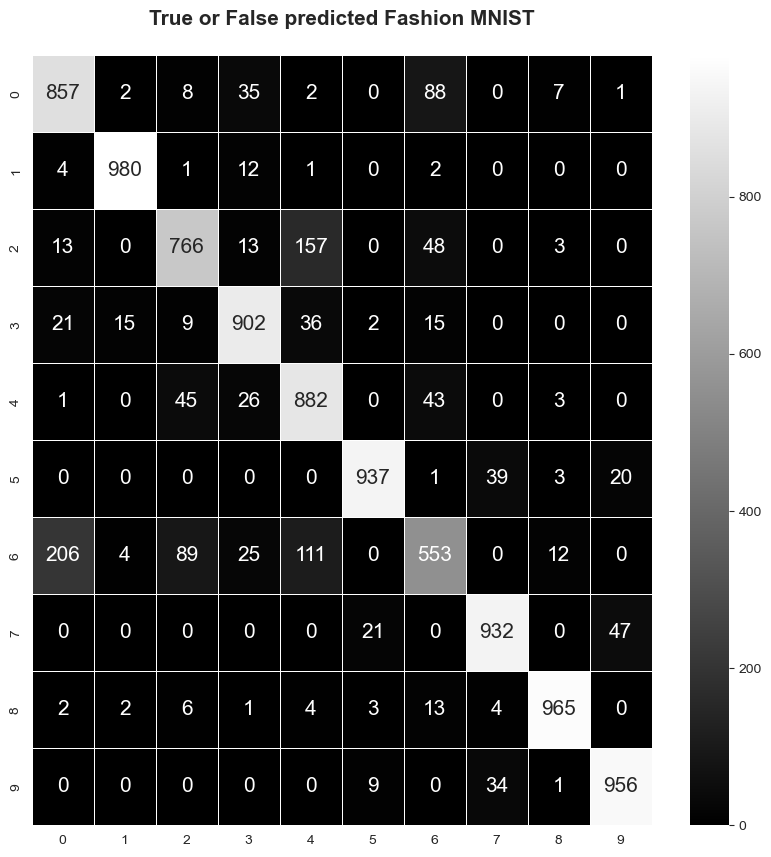

In [74]:
plt.figure(figsize=(10,10))
sns.heatmap(con_matrix, annot = True, annot_kws = {'size':15},linewidths = 0.5, fmt="d", cmap = 'grey')
plt.title("True or False predicted Fashion MNIST\n",fontweight = 'bold',fontsize=15)

In [80]:
print(classification_report(y_test_digit_eval,y_predict)) # classification report

# Overall accuracy is around 87

              precision    recall  f1-score   support

           0       0.78      0.86      0.81      1000
           1       0.98      0.98      0.98      1000
           2       0.83      0.77      0.80      1000
           3       0.89      0.90      0.90      1000
           4       0.74      0.88      0.80      1000
           5       0.96      0.94      0.95      1000
           6       0.72      0.55      0.63      1000
           7       0.92      0.93      0.93      1000
           8       0.97      0.96      0.97      1000
           9       0.93      0.96      0.94      1000

    accuracy                           0.87     10000
   macro avg       0.87      0.87      0.87     10000
weighted avg       0.87      0.87      0.87     10000



In [82]:
print(history.history.keys())


dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])


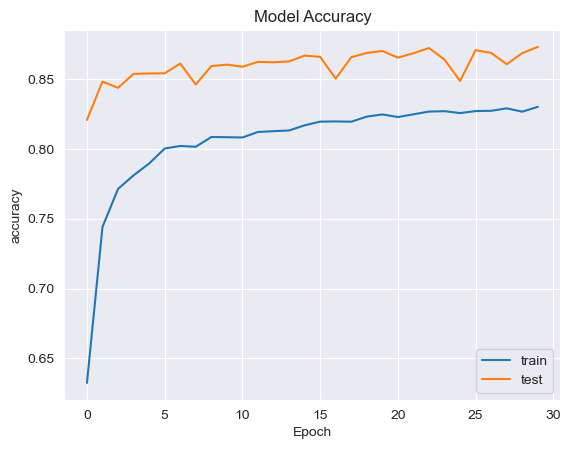

In [84]:
# accuracy Graph

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('accuracy')
plt.legend(['train','test'],loc = 'best')
plt.show()

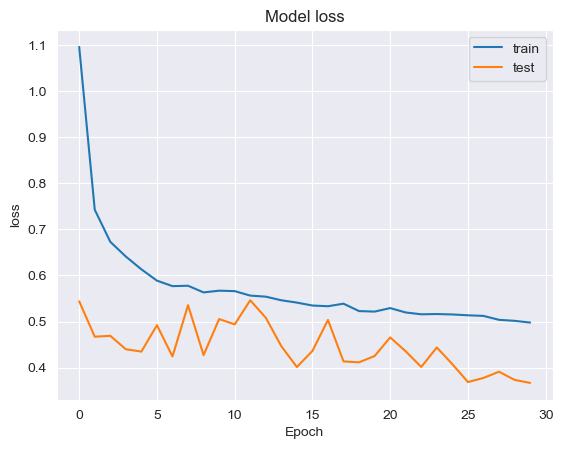

In [86]:
#Loss Graph

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.xlabel('Epoch')
plt.ylabel('loss')
plt.legend(['train','test'],loc = 'best')
plt.show()

In [98]:
#tf.expand_dims(X_test_digit[0])
y_predict = model.predict(X_test_fashion.loc[[0],:].values)
y_predict=np.argmax(y_predict, axis=1) # Here we get the maximum value index in the encoded vector
y_test_fashion_eval=np.argmax(y_test_fashion, axis=1)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step


In [100]:
y_test_fashion_eval

array([0, 1, 2, ..., 8, 8, 1], dtype=int64)

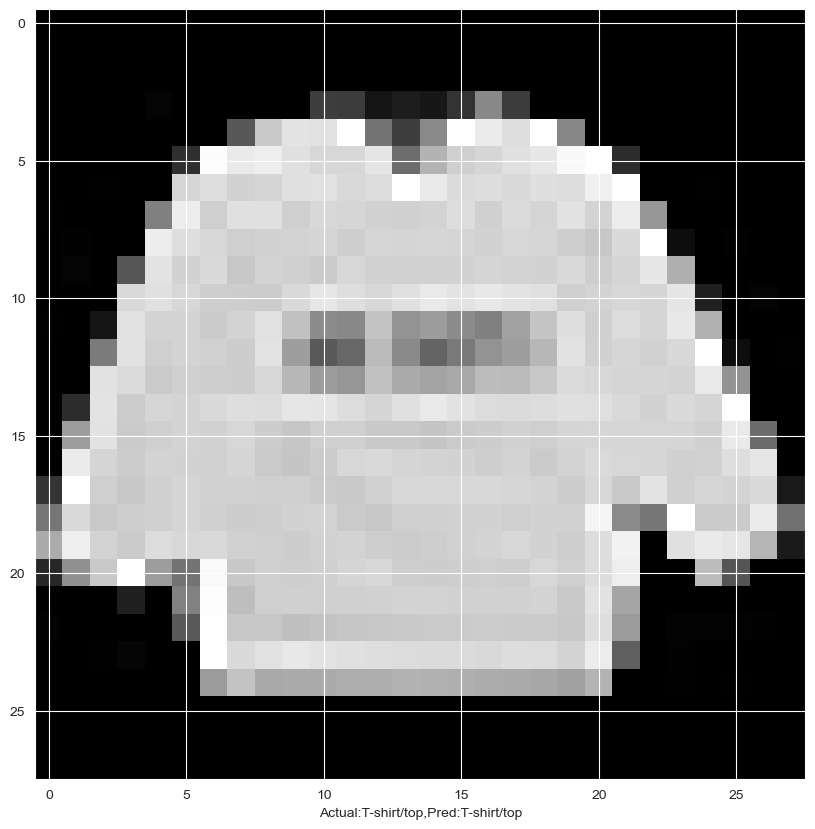

In [104]:
#Visualizing the images
plt.figure(figsize=(10,10))

plt.imshow(X_train_reshape[0], cmap='gray')
plt.xlabel("Actual:{},Pred:{}".format(col_names[np.argmax(y_test_fashion[0])],col_names[y_predict[0]]))
plt.show()